# Introduction to Machine Learning

Artificial Intelligence (AI) is a broad field of computer science that focuses on creating systems capable of performing tasks that normally require human intelligence. AI encompasses a wide range of disciplines and technologies, and it can be divided into several key subdivisions, each with its own focus and methodologies.

## Subdivisions of AI

### 1. **Machine Learning (ML)**
   - **Definition**: Machine Learning is a subset of AI that involves the development of algorithms that allow computers to learn from and make predictions or decisions based on data.
   - **Core Idea**: Instead of explicitly programming the system to perform a task, ML algorithms are trained on large datasets to recognize patterns and make decisions.
   - **Applications**:
     - **Classification**: Email spam detection, image recognition.
     - **Regression**: Stock price prediction, house price estimation.
     - **Clustering**: Customer segmentation, anomaly detection.

### 2. **Natural Language Processing (NLP)**
   - **Definition**: NLP is a subdivision of AI focused on enabling machines to understand, interpret, and generate human language.
   - **Core Idea**: It combines computational linguistics and machine learning to process and analyze large amounts of natural language data.
   - **Applications**:
     - **Text Classification**: Sentiment analysis, spam detection.
     - **Machine Translation**: Language translation services like Google Translate.
     - **Speech Recognition**: Voice-activated assistants like Siri and Alexa.

### 3. **Reinforcement Learning (RL)**
   - **Definition**: Reinforcement Learning is a type of machine learning where agents learn to make decisions by performing actions in an environment to maximize cumulative rewards.
   - **Core Idea**: It is based on the concept of trial and error, where the system learns optimal behavior through feedback from its actions.
   - **Applications**:
     - **Game Playing**: AI playing games like Go, Chess.
     - **Robotics**: Learning to control robots in complex environments.
     - **Autonomous Systems**: Navigation for drones and self-driving cars.

![alt text](./img/image.png)

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from utils.lab_utils_common import dlc, plot_data
from utils.plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./utils/deeplearning.mplstyle')

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

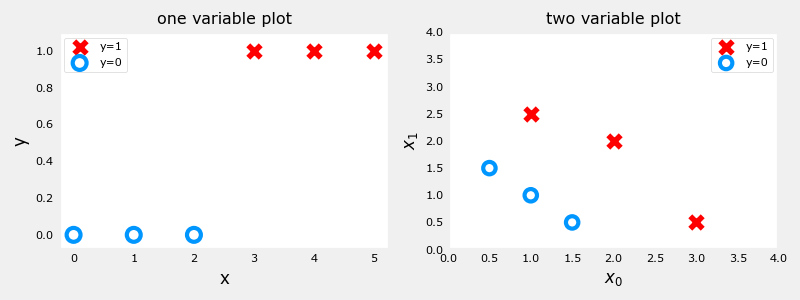

In [3]:
%matplotlib widget
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

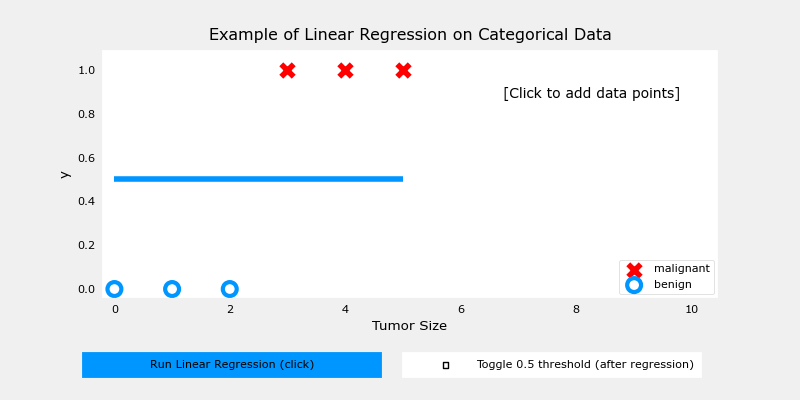

In [4]:
%matplotlib widget
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

In [5]:
plt.close('all') 

### Introduction to Logistic Regression

We can start by using our linear regression modelto predict $y$ given $x$, $$f_{(w, b)}(x^{(i)}) = w . x^{(i)} + b$$

However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1.

This can be accomplished by using a "**sigmoid function**" which maps all input values to values between 0 and 1.

### The Sigmoid Function

![image.png](./img/Logistic-curve.png)

The formula for a sigmoid function is as follows -

$$g(z) = \frac{1}{1 + e^{-z}} $$ 

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#X represents the size of a tumor in centimeters.
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

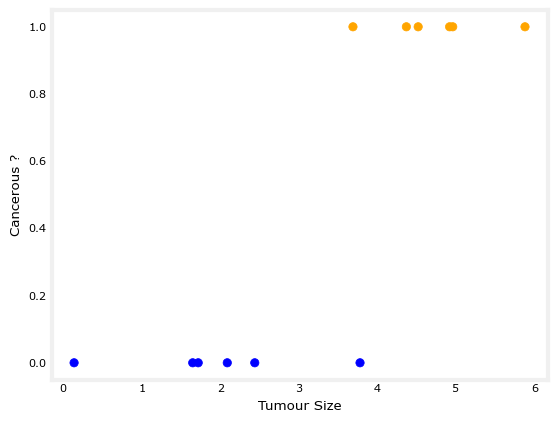

In [8]:
%matplotlib inline
colors = list(map(lambda x: 'orange' if x else 'blue', y))
plt.scatter(X, y, c=colors)
plt.ylabel('Cancerous ?')
plt.xlabel('Tumour Size')
plt.show()

In [9]:
from sklearn import linear_model

logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [10]:
predicted = logr.predict(np.array([3.46]).reshape(-1,1))

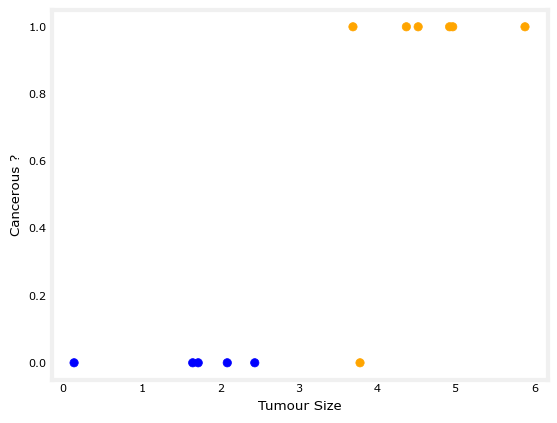

In [11]:
preds = logr.predict(X)
colors = list(map(lambda x: 'orange' if x else 'blue', preds))
plt.scatter(X, y, c=colors)
plt.ylabel('Cancerous ?')
plt.xlabel('Tumour Size')
plt.show()

## Model Evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.

### 1. Classification Report (Precision, Recall, F1 Score)

- The **Precision** is the ratio $$\frac{tp}{(tp + fp)}$$ where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

- The **Recall** is the ratio $$\frac{tp}{(tp + fn)}$$ where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



### 2. Confusion Matrix

A confusion matrix is a two-dimensional table that compares predicted values to actual values in a dataset to evaluate the performance of a classification model. It shows how many predictions are correct and incorrect per class, and can help identify which classes of data are most often confused.

In [13]:
from sklearn.metrics import confusion_matrix

# Model Validation
matrix = confusion_matrix(y, preds)
matrix

array([[5, 1],
       [0, 6]], dtype=int64)

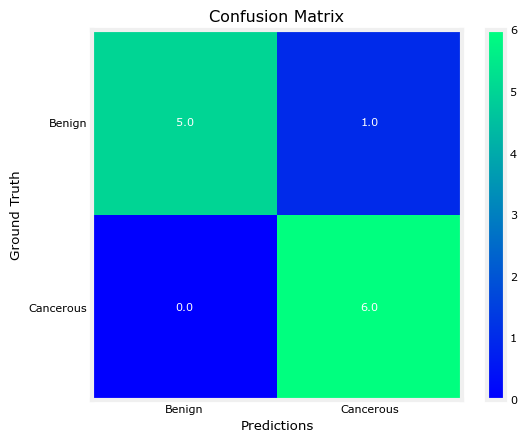

In [14]:
figure = plt.figure()
axes = figure.add_subplot(111)
# using the matshow() function 
caxes = axes.matshow(matrix, cmap='winter')
figure.colorbar(caxes)

axes.set_title('Confusion Matrix')
axes.set_xticks([0, 1], ['Benign', 'Cancerous'])
axes.xaxis.set_ticks_position('bottom')
axes.set_yticks([0, 1], ['Benign', 'Cancerous'])
axes.set_xlabel('Predictions')
axes.set_ylabel('Ground Truth')

for (i, j), z in np.ndenumerate(matrix):
    axes.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', c='white', )
 
plt.show()